# ECS7020P mini-project advanced solution submission

Please note that the illustrations produced chapter 4 Transformations were done after completing the results, therefore they will prompt an error if cells are ran in order.

# 1 Author

**Student Name**: Michael Capaldi

**Student ID**:  210641428


# 2 Problem formulation

Extending further from the basic solution, the advanced task is multi-class classification, what machine learning model performs the best when considering five songs instead of two. Once again, each song's files had a plethora of features extracted which we're used as predictors for our five labels. In this task the songs in question were 'potter', 'starwars', 'hakuna', 'panther' and 'mamma'. These files were selected in particular as from personal experience they we're the most known and easiest tunes to record and generally remember.
 


# 3 Machine Learning pipeline

1 - Loading datasets and cleaning them. After loading all the files the first stage is to clean up the dataframe. This was simply done on each songs dataframe respectively, as this was done before concatenating all the files together. Knowing each song within the dataframe was the same (as it came out of it's corresponding folder), the song column was immediately renamed.
This process is demonstrated in chapter 7 of this notebook below.

2 - Feature extraction. The function below defined 'get_Xy' had many constituent parts. It's role would be to read each audio object for the chosen files passed in, and go about extracting a wide range of features, these included pitch, spectral_centroid, spectral roll off and many more. Each of these features are looked into detail in the tranformation stage below.

3 - Normalisation. The notion of distance behind many machine learning techniques and with so many numerical values all represented using different units it can become incommensurable and subsequently have a great impact on the final model and overall performance of our algorithm. Therefore what normalisation also known as scaling does, is it scales down all numerical values into a much smaller range, typically between -1 and 1 or between 0 and 1. There are a few ways to perform normalisation such as 'Min-Max' or 'Z-score' and at this stage scaling is done [1].


4 - Feature selection. In this section we start to reduce dimensionality of our dataset and only consider features that hold the most significant relevance to out labels. This is shown in chapter 7 'Dataset', using what is known as a 'Wrapper' method, this method follows a greedy search approach by evaluating all possibile combinations of features against the evaluation criteria which in our binary classification case is 'F1-Score'. With this sequential feature selection we were able to use the algorithm to pick out the top five features to use for our final machine learning model [2].

5 - Attempting to adjust the hyperparameters for the most accurate model's to observe if greater accuracy/F1-scores can be achieved.

6 - Lastly all the models used will be evaluated by observing the metrics via the scikit-learn libraries such as confusion matrix and the classification report.


# 4 Transformation stage

All the feature extraction was executed by the get_Xy function located at the bottom of Chapter 7 below. The signifcant question is exactly what features should be extracted from the audio files. First of all the features extracted in the 'Starter Pack' were carried over, these included 'power', 'pitch mean', 'pitch standard deviation' and 'voiced flag'. The last feature is a time series containing boolean flags indicated whether a frame is voiced or not, this is an important feature as each song used will contain specific times when there is silence or noise just by the nature of the song. Moreover the pitch mean and standard deviation is also a good feature to include as different songs will naturally have varying pitches.

Along with these important features used beforehand, other features were calculated and taken into consideration thanks to the librosa library. Here I will discuss the various features extracted and below will provide any possible plots to supplement the decision to include the feaure.

The first was the chromagram, this feature relates to the different pitch classes where the output is a 12 element array, looking at five chromagram examples below for potter you can see there is some consistency and therefore inclusion was used. 

Next feature was the 'zero crossing rate', this interesting feature measures the rate at which the signa changes (i.e. the rate which the signal goes from positive to negative or vice versa). Just like voice flag mentioned previously, the corresponding values calculated should be directly linked to the nature of each song [3].

Another feature used was the MFCC (Mel-Frequency Cepstral Coefficients). This is one of the most popular features used in audio feature extraction, this method returns coefficients that make up the 'Mel-frequency cepstrum' which relates to the information of rate of change in spectral bands [4].

The spectral centroid was also taken into account when extracting features. Each frame's magnitude spectrogram is normalized and is used as a distribution over frequency bins, subsequently the centroid (mean) is extracted per frame [5]. In other words itindicates where the centre of mass for each sound is located. Similarly, spectral roll-off returns results for each frame, however, it only consists of the frequency below a specificed percentage of the total spectral energy, in our case the default 85% was used. 

The final feature considered was the constant-Q chromagram which transforms the data series into a logarithmically spaced frequency axis, it is often used in musical data hence why it was included in this task [6].


**Chromagram spectrum examples**

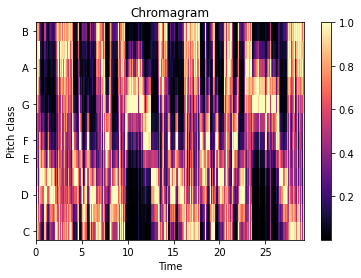

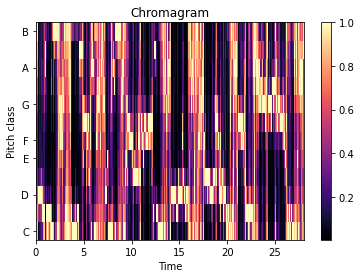

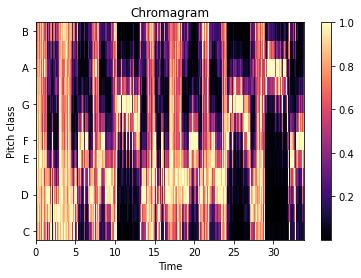

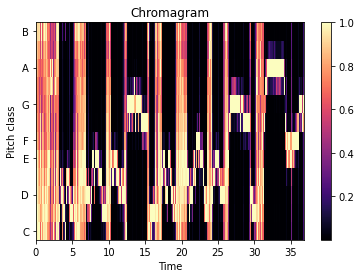

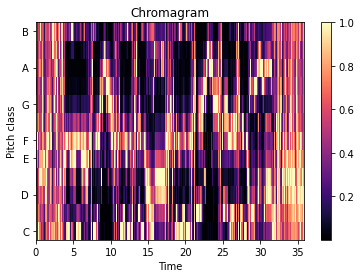

In [73]:
import librosa
import librosa.display
for file in mamma_files[0:5]:
  fs = None 
  x, fs = librosa.load(file,sr=fs)
  chroma = librosa.feature.chroma_stft(x, sr=fs)
  fig, ax = plt.subplots()
  img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
  fig.colorbar(img, ax=ax)
  fig.figsize=(15,6)
  ax.set(title='Chromagram')

**Zero Crossing Rate spectrum examples**

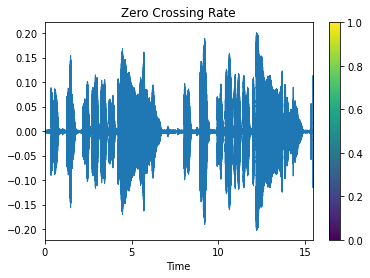

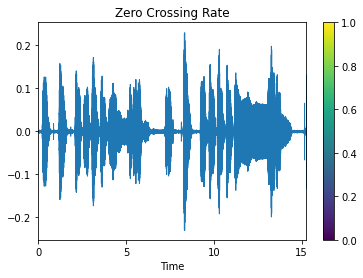

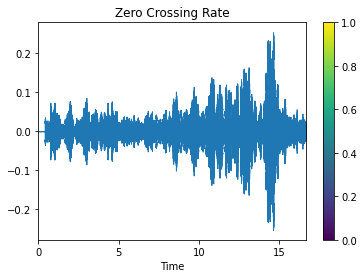

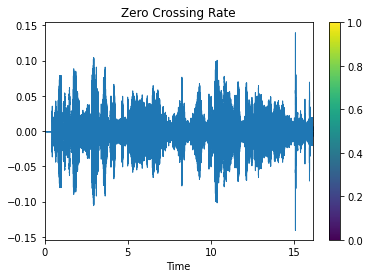

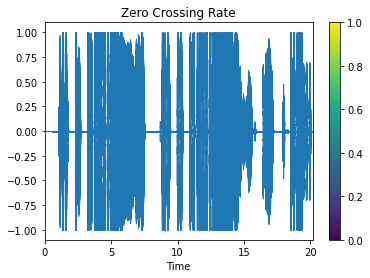

In [74]:
for file in panther_files[40:45]:
  fs = None 
  x, fs = librosa.load(file,sr=fs)
  zero = librosa.feature.zero_crossing_rate(x, pad=False)
  fig, ax = plt.subplots()
  img = librosa.display.waveplot(x, sr=fs)
  fig.colorbar(img, ax=ax)
  fig.figsize=(15,6)
  ax.set(title='Zero Crossing Rate')

**MFCC spectrum examples**

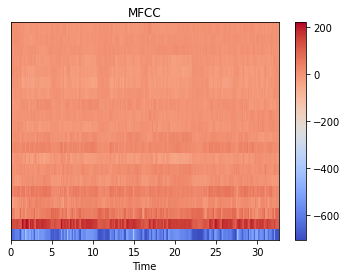

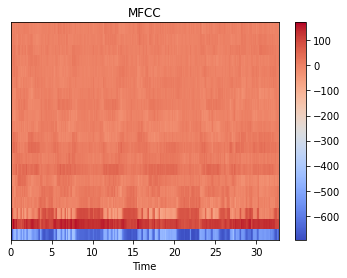

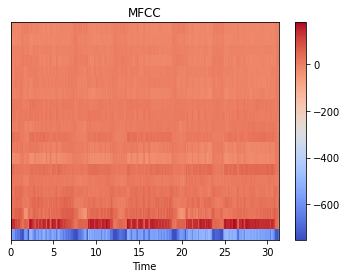

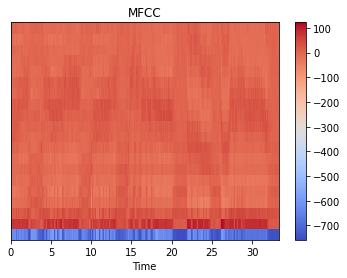

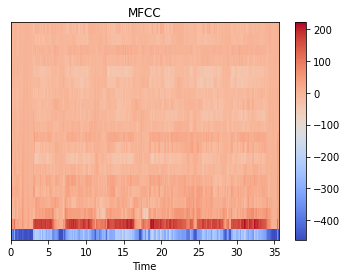

In [75]:
for file in hakuna_files[0:5]:
  fs = None 
  x, fs = librosa.load(file,sr=fs)
  mfcc = librosa.feature.mfcc(x)
  fig, ax = plt.subplots()
  img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
  fig.colorbar(img, ax=ax)
  fig.figsize=(15,6)
  ax.set(title='MFCC')

**Chromagram CQT Spectum Examples**

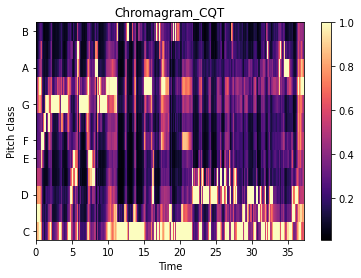

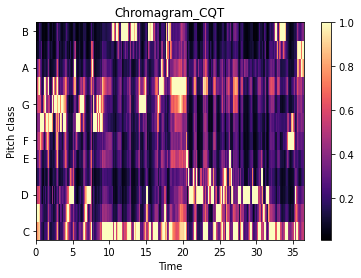

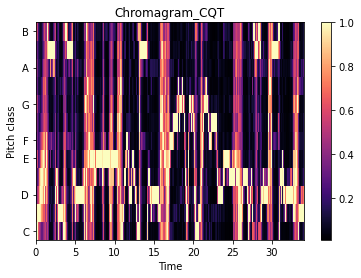

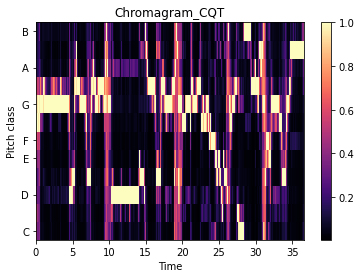

In [76]:
for file in sw_files[40:44]:
  fs = None 
  x, fs = librosa.load(file,sr=fs)
  chroma_cqt = librosa.feature.chroma_cqt(x, sr=fs)
  fig, ax = plt.subplots()
  img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', ax=ax)
  fig.colorbar(img, ax=ax)
  fig.figsize=(15,6)
  ax.set(title='Chromagram_CQT')
  

# 5 Modelling

As this task is a multi-classified, the approach taken was to use all the classification algorithms via supervised learning. In this case 'Support Vector Classifier' was no longer applicable as that model considers only binary classification, so therefore 'Random Forest Classifier', 'K-Nearest Neighbors' and 'Logisitic Regression' we're considered instead. Similarly to the basic solution, a sequential neural net (NN) was created to investigate if a NN would perform better than the traditional models. Once again, both raw values and scaled data were investigated to just for completeness.

The random forest classifier (RFC) builds an ensemble of decision regions by implementing sequences of splitting rules using only one predictor only. Simple understood it is like a logical operation at every 'leaf', if some feature is greater than some abritrary number then move forward to another leaf. The goal is to create leaves that contain as many samples of the same class.
[1]

K-Nearest Neighbors is a very simple algorithm to understand, new samples are assigned the label of the closest training samples. The number of nearest neighbors can be user specified and are shown below in the results section of this notebook; in addition the 'elbow method' is used, this is a technique to search for the best value to set for n_neighbors in order to minimise the error from the model. 
[1]

Each model was executed with both raw data and scaled data to compute whether these values had any bearing on the performance.

Another aspect taken into consideration was the features themselves, by using 'Sequential Feature Selection' (SFS). With our most accurate performing models SFS was used to determine exactly what combination of features were most relevant to classifier between Potter and Starwars. Once specified, an updated version of the models were computed using only those significant features. 

# 6 Methodology

Each model will be fitted to the training data set, as you can see from the results below in chapter 8, and    80/20 split was performed for training and validation sets respectively. Calling the 'predict' methods it was possible to produce predicted labels for both the training and validation sets of data and return a mean accuracy score. Furthermore, using scikit-learn metrics library a classification report and confusion matrix were produced for each model, these provide more information such as the F1-score which considers both precision and recall. In addition, the confusion matrix returns the true numbers of false positives, negatives and true positives and negatives.


# 7 Dataset



In [7]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
from scipy.io import wavfile

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# function to download files from the url link
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, 'wb') as out_file:
            out_file.write(dl_file.read())

In [9]:
# commented out once files were saved on the drive

# url  = "https://collect.qmul.ac.uk/down?t=6122TDAA73VPCMDQ/5DSHD27BLQMK5S8E1HLG19O"
# save_path = '/content/drive/MyDrive/Data/MLEndHW/Potter_1.zip'
# download_url(url, save_path)

# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Potter_1/'
# zip_path = '/content/drive/MyDrive/Data/MLEndHW/Potter_1.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Potter_1/*.wav'
pot_files = glob.glob(sample_path)
len(pot_files)

206

In [10]:
# commented out once files were saved on the drive

# url  = "https://collect.qmul.ac.uk/down?t=650T7K3FAE26MB29/592IN2FALUM43SGC35O0580"
# save_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars_1.zip'
# download_url(url, save_path)

path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/StarWars_1/'
# zip_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars_1.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/StarWars_1/*.wav'
sw_files = glob.glob(sample_path)
len(sw_files)

208

In [11]:
# commented out once files were saved on the drive

# url  = "https://collect.qmul.ac.uk/down?t=R8RSMAE6KHLG5DEM/55VMAJEMJEC7SDANP4NSFQ0"
# save_path = '/content/drive/MyDrive/Data/MLEndHW/Hakuna_1.zip'
# download_url(url, save_path)

path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Hakuna_1/'
# zip_path = '/content/drive/MyDrive/Data/MLEndHW/Hakuna_1.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Hakuna_1/*.wav'
hakuna_files = glob.glob(sample_path)
len(hakuna_files)

213

In [12]:
# url  = "https://collect.qmul.ac.uk/down?t=6PEJ3F3JAUC7UC2D/4L7DHN27184UV966BQVL6T0"
# save_path = '/content/drive/MyDrive/Data/MLEndHW/Panther_1.zip'
# download_url(url, save_path)

path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Panther_1/'
# zip_path = '/content/drive/MyDrive/Data/MLEndHW/Panther_1.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Panther_1/*.wav'
panther_files = glob.glob(sample_path)
len(panther_files)

208

In [13]:
# url  = "https://collect.qmul.ac.uk/down?t=556J7CAE7JPPKNDU/4TSGN54VAB0LE73US43UBJ8"
# save_path = '/content/drive/MyDrive/Data/MLEndHW/Mamma_1.zip'
# download_url(url, save_path)

path = '/content/drive/MyDrive/Data/MLEndHW'
os.listdir(path)

# directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndHW/Mamma_1/'
# zip_path = '/content/drive/MyDrive/Data/MLEndHW/Mamma_1.zip'
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

sample_path = '/content/drive/MyDrive/Data/MLEndHW/Mamma_1/*.wav'
mamma_files = glob.glob(sample_path)
len(mamma_files)

217

In [14]:
# extracting file name and song name for potter audio files
potter = []
for file in pot_files:
  file_name = file.split('/')[-1]
  song = file_name.split('_')[-1].split('.')[0]
  potter.append([file_name,song])

potter_df = pd.DataFrame(potter, columns=['file_id','song'])
# cleaning all the song mistakes
potter_df['song'] = 'potter'
potter_df

,file_id,song
0,S1_hum_2_Potter.wav,potter
1,S3_hum_1_Potter.wav,potter
2,S1_whistle_2_Potter.wav,potter
3,S2_whistle_2_Potter.wav,potter
4,S2_hum_2_Potter.wav,potter
...,...,...
201,S110_hum_2_Potter.wav,potter
202,S111_hum_2_Potter.wav,potter
203,S114_hum_2_potter.wav,potter
204,S115_hum_2_Potter.wav,potter


In [15]:
# extracting file name and song name for Star Wars audio files
starwars = []
for file in sw_files:
  file_name = file.split('/')[-1]
  song = file_name.split('_')[-1].split('.')[0]
  starwars.append([file_name,song])

starwars_df = pd.DataFrame(starwars, columns=['file_id','song'])
# cleaning all the song mistakes
starwars_df['song'] = 'starwars'
starwars_df

,file_id,song
0,S1_hum_2_StarWars.wav,starwars
1,S1_whistle_2_StarWars.wav,starwars
2,S3_hum_3_StarWars.wav,starwars
3,S2_whistle_2_StarWars.wav,starwars
4,S3_hum_4_StarWars.wav,starwars
...,...,...
203,S111_hum_4_StarWars.wav,starwars
204,S110_hum_4_StarWars.wav,starwars
205,S114_hum_3_star wars.wav,starwars
206,S114_hum_4_star wars.wav,starwars


In [16]:
# extracting file name and song name for Hakuna audio files
hakuna = []
for file in hakuna_files:
  file_name = file.split('/')[-1]
  song = file_name.split('_')[-1].split('.')[0]
  hakuna.append([file_name,song])

hakuna_df = pd.DataFrame(hakuna, columns=['file_id','song'])
# cleaning all the song mistakes
hakuna_df['song'] = 'hakuna'
hakuna_df

,file_id,song
0,S1_hum_2_Hakuna.wav,hakuna
1,S1_whistle_2_Hakuna.wav,hakuna
2,S2_hum_2_Hakuna.wav,hakuna
3,S2_whistle_2_Hakuna.wav,hakuna
4,S3_hum_1_Hakuna.wav,hakuna
...,...,...
208,S116_hum_1_Hakuna.wav,hakuna
209,S116_hum_2_Hakuna.wav,hakuna
210,S117_hum_2_Hakuna.wav,hakuna
211,S117_whistle_2_Hakuna.wav,hakuna


In [17]:
# extracting file name and song name for Panther audio files
panther = []
for file in panther_files:
  file_name = file.split('/')[-1]
  song = file_name.split('_')[-1].split('.')[0]
  panther.append([file_name,song])

panther_df = pd.DataFrame(panther, columns=['file_id','song'])
# cleaning all the song mistakes
panther_df['song'] = 'panther'
panther_df

,file_id,song
0,S1_hum_2_Panther.wav,panther
1,S1_whistle_1_Panther.wav,panther
2,S3_whistle_1_Panther.wav,panther
3,S3_hum_2_Panther.wav,panther
4,S2_hum_2_Panther.wav,panther
...,...,...
203,S111_hum_2_Panther.wav,panther
204,S111_hum_4_Panther.wav,panther
205,S114_hum_2_panther.wav,panther
206,S114_hum_4_panther.wav,panther


In [18]:
# extracting file name and song name for Mamma-Mia audio files
mamma = []
for file in mamma_files:
  file_name = file.split('/')[-1]
  song = file_name.split('_')[-1].split('.')[0]
  mamma.append([file_name,song])

mamma_df = pd.DataFrame(mamma, columns=['file_id','song'])
# cleaning all the song mistakes
mamma_df['song'] = 'mamma'
mamma_df

,file_id,song
0,S1_hum_2_Mamma.wav,mamma
1,S1_whistle_2_Mamma.wav,mamma
2,S2_hum_2_Mamma.wav,mamma
3,S2_whistle_2_Mamma.wav,mamma
4,S3_hum_2_Mamma.wav,mamma
...,...,...
212,S118_hum_2_Mamma.wav,mamma
213,S118_hum_3_Mamma.wav,mamma
214,S119_hum_2_Mamma.wav,mamma
215,S119_hum_3_Mamma.wav,mamma


In [19]:
# creating a data complete with all audio files which will be used when extracting features later
df = pd.concat([potter_df, starwars_df, hakuna_df, panther_df, mamma_df], axis=0)
df.set_index('file_id',inplace=True)
df['song'].value_counts()

mamma       217
hakuna      213
panther     208
starwars    208
potter      206
Name: song, dtype: int64

In [20]:
# function used to calculate pitch
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [21]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  for file in tqdm(files):
      fileID = file.split('/')[-1]
      file_name = file.split('/')[-1]
      # labels created are the song name for whatever audio files are passed in
      yi = labels_file.loc[fileID]['song']

    

      #Load an audio file as a floating point time series.
      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)

      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      # calculating features given beforehand
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)
      
      
      # get chroma stft
      chroma = librosa.feature.chroma_stft(x, sr=fs)
      chroma_mean = np.nanmean(chroma) #if np.mean(np.isnan(chroma))<1 else 0
      # get sftf
      stft = librosa.stft(x)
      Xdb = librosa.amplitude_to_db(abs(stft))
      Xdb_mean = np.nanmean(Xdb) #if np.mean(np.isnan(Xdb))<1 else 0
      # get zero corssing rate
      zero = librosa.feature.zero_crossing_rate(x, pad=False)
      zero_mean = np.nanmean(zero)  
      # get mfcc 
      mfcc = librosa.feature.mfcc(x)
      mfcc_mean = np.nanmean(mfcc)
      # get spectral centroid
      spec_cent = librosa.feature.spectral_centroid(x, sr=fs)
      spec_cent_mean = np.nanmean(spec_cent)

      # get spectral roll
      roll_off = librosa.feature.spectral_rolloff(x, sr=fs)
      roll_off_mean = np.nanmean(roll_off)

      # get chroma stft
      chroma_cqt = librosa.feature.chroma_cqt(x, sr=fs)
      chroma_cqt_mean = np.nanmean(chroma_cqt)


        
      # appends all the values for each calculated feature to an array
      xi = [power, pitch_mean, pitch_std, voiced_fr, chroma_mean, Xdb_mean, zero_mean, mfcc_mean, spec_cent_mean, roll_off_mean, chroma_cqt_mean]
      X.append(xi)
      y.append(yi)

  return np.array(X),np.array(y)

In [22]:
# extracting featues for potter files
X,y = getXy(pot_files, labels_file=df, scale_audio=False, onlySingleDigit=True)

100%|██████████| 206/206 [15:25<00:00,  4.49s/it]


In [23]:
# keeping a record of features and labels for potter
pot_features = X
pot_labels = y

In [24]:
# extracting featues for potter files
X,y = getXy(sw_files, labels_file=df, scale_audio=False, onlySingleDigit=True)

100%|██████████| 208/208 [16:36<00:00,  4.79s/it]


In [25]:
# keeping a record of features and labels for starwars
sw_features = X
sw_labels = y

In [26]:
# extracting featues for potter files
X,y = getXy(hakuna_files, labels_file=df, scale_audio=False, onlySingleDigit=True)

100%|██████████| 213/213 [16:40<00:00,  4.70s/it]


In [27]:
# keeping a record of features and labels for hakuna
hak_features = X
hak_labels = y

In [28]:
# extracting featues for potter files
X,y = getXy(panther_files, labels_file=df, scale_audio=False, onlySingleDigit=True)

100%|██████████| 208/208 [16:03<00:00,  4.63s/it]


In [29]:
# keeping a record of features and labels for panther
pan_features = X
pan_labels = y

In [30]:
# extracting featues for potter files
X,y = getXy(mamma_files, labels_file=df, scale_audio=False, onlySingleDigit=True)

100%|██████████| 217/217 [16:50<00:00,  4.66s/it]


In [31]:
# keeping a record of features and labels for mamma
mam_features = X
mam_labels = y

In [32]:
# for each song, a dataframe consisting of each features value and label were created
potter_features_df = pd.DataFrame(pot_features, columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr','chroma_mean', 'Xdb_mean', 'zero_mean', 'mfcc_mean', 'spec_cent_mean', 'roll_off_mean', 'chroma_cqt_mean'])
potter_features_df['label'] = pot_labels
potter_features_df

sw_features_df = pd.DataFrame(sw_features, columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr','chroma_mean', 'Xdb_mean', 'zero_mean', 'mfcc_mean', 'spec_cent_mean', 'roll_off_mean', 'chroma_cqt_mean'])
sw_features_df['label'] = sw_labels
sw_features_df

hak_features_df = pd.DataFrame(hak_features, columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr','chroma_mean', 'Xdb_mean', 'zero_mean', 'mfcc_mean', 'spec_cent_mean', 'roll_off_mean', 'chroma_cqt_mean'])
hak_features_df['label'] = hak_labels
hak_features_df

pan_features_df = pd.DataFrame(pan_features, columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr','chroma_mean', 'Xdb_mean', 'zero_mean', 'mfcc_mean', 'spec_cent_mean', 'roll_off_mean', 'chroma_cqt_mean'])
pan_features_df['label'] = pan_labels
pan_features_df

mam_features_df = pd.DataFrame(mam_features, columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr','chroma_mean', 'Xdb_mean', 'zero_mean', 'mfcc_mean', 'spec_cent_mean', 'roll_off_mean', 'chroma_cqt_mean'])
mam_features_df['label'] = mam_labels
mam_features_df


,power,pitch_mean,pitch_std,voiced_fr,chroma_mean,Xdb_mean,zero_mean,mfcc_mean,spec_cent_mean,roll_off_mean,chroma_cqt_mean,label
0,0.000200,161.962988,21.947905,0.603819,0.471536,-46.164581,0.022198,-14.112857,2315.173204,5880.020557,0.362901,mamma
1,0.000009,412.366455,15.156583,0.062189,0.416921,-47.412998,0.089121,-17.227829,3932.445973,8710.412780,0.542343,mamma
2,0.000048,168.453477,25.918110,0.695682,0.466811,-51.005463,0.038063,-19.140699,3694.376029,8115.980853,0.288392,mamma
3,0.000035,408.486417,29.111533,0.652778,0.348388,-51.329578,0.079385,-26.999132,5240.015385,10738.801436,0.322961,mamma
4,0.003725,169.358667,22.275938,0.642255,0.424916,-36.229660,0.037619,-10.691417,1919.278436,3682.038180,0.373040,mamma
...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.015401,167.973020,19.877326,0.614119,0.482086,-27.199020,0.053965,-8.706986,3572.335961,7392.589203,0.357090,mamma
213,0.026020,172.012957,19.179807,0.607708,0.470518,-25.600376,0.055064,-8.344302,3606.674207,7324.697622,0.387696,mamma
214,0.013893,188.201504,21.218455,0.758860,0.271391,-28.321262,0.052047,-15.016189,2213.972722,3421.838322,0.312354,mamma
215,0.003723,180.389250,25.987782,0.825250,0.282691,-34.544739,0.061507,-14.960053,2617.281627,4833.980315,0.281243,mamma


In [33]:
import pandas as pd
import numpy as np

In [34]:
# dataframe consisting of all raw values for every song
df_unscaled = pd.concat([potter_features_df, sw_features_df, hak_features_df, pan_features_df, mam_features_df], axis=0)
all_labels = df_unscaled.iloc[:,-1].values
df_unscaled


,power,pitch_mean,pitch_std,voiced_fr,chroma_mean,Xdb_mean,zero_mean,mfcc_mean,spec_cent_mean,roll_off_mean,chroma_cqt_mean,label
0,0.000040,107.628769,14.832539,0.461431,0.511480,-51.819038,0.036607,-16.540197,2965.937032,7910.356562,0.439770,potter
1,0.015373,184.280074,27.611400,0.935164,0.327994,-31.077398,0.013935,-5.438882,951.820399,1557.207009,0.196900,potter
2,0.000006,408.684951,31.757141,0.185645,0.316467,-50.780972,0.090304,-21.371918,4031.218885,8731.602412,0.601838,potter
3,0.000017,396.012292,40.644200,0.766846,0.259059,-55.196877,0.068537,-27.273115,4436.822076,9284.104372,0.280940,potter
4,0.000026,179.379037,47.894724,0.850131,0.395303,-55.449951,0.019544,-18.620310,2475.002768,3936.094785,0.236205,potter
...,...,...,...,...,...,...,...,...,...,...,...,...
212,0.015401,167.973020,19.877326,0.614119,0.482086,-27.199020,0.053965,-8.706986,3572.335961,7392.589203,0.357090,mamma
213,0.026020,172.012957,19.179807,0.607708,0.470518,-25.600376,0.055064,-8.344302,3606.674207,7324.697622,0.387696,mamma
214,0.013893,188.201504,21.218455,0.758860,0.271391,-28.321262,0.052047,-15.016189,2213.972722,3421.838322,0.312354,mamma
215,0.003723,180.389250,25.987782,0.825250,0.282691,-34.544739,0.061507,-14.960053,2617.281627,4833.980315,0.281243,mamma


In [35]:
# replacing label column to numerical values
df_unscaled['label'].replace({'potter':0,'starwars':1,'hakuna':2,'panther':3,'mamma':4}, inplace=True)


In [36]:
# check
df_unscaled['label'].value_counts()

4    217
2    213
3    208
1    208
0    206
Name: label, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
# scaling all values to compute the difference in performance of our ML algorithms using raw and scaled data
values = df_unscaled.drop('label', axis=1)
scaler = StandardScaler()
scaler.fit(values)
X_norm = scaler.transform(values)
df_scaled = pd.DataFrame(X_norm, columns=['power', 'pitch_mean', 'pitch_std', 'voiced_fr','chroma_mean', 'Xdb_mean', 'zero_mean', 'mfcc_mean', 'spec_cent_mean', 'roll_off_mean', 'chroma_cqt_mean'])
df_scaled['label'] = df_unscaled['label'].values
df_scaled

,power,pitch_mean,pitch_std,voiced_fr,chroma_mean,Xdb_mean,zero_mean,mfcc_mean,spec_cent_mean,roll_off_mean,chroma_cqt_mean,label
0,-0.348114,-1.551565,-1.476346,-1.998083,1.899486,-1.984499,-0.632362,-0.363791,0.118719,0.975354,1.833121,0
1,0.078197,-0.765165,-0.713454,1.925656,-0.272869,0.536574,-1.163039,1.273680,-1.602675,-1.520374,-1.947449,0
2,-0.349052,1.537104,-0.465955,-4.282300,-0.409345,-1.858326,0.624488,-1.076481,1.029178,1.297966,4.355909,0
3,-0.348749,1.407090,0.064599,0.531551,-1.089017,-2.395064,0.114999,-1.946922,1.375832,1.515007,-0.639266,0
4,-0.348513,-0.815447,0.497452,1.221362,0.524029,-2.425824,-1.031747,-0.670613,-0.300865,-0.585868,-1.335614,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0.078967,-0.932467,-1.175174,-0.733425,1.551482,1.007977,-0.226067,0.791626,0.636987,0.771957,0.546098,4
1048,0.374210,-0.891019,-1.216816,-0.786526,1.414519,1.202287,-0.200361,0.845123,0.666334,0.745287,1.022528,4
1049,0.037036,-0.724934,-1.095110,0.465401,-0.943025,0.871573,-0.270974,-0.138996,-0.523958,-0.787885,-0.150275,4
1050,-0.245717,-0.805083,-0.810383,1.015286,-0.809230,0.115131,-0.049544,-0.130716,-0.179265,-0.233149,-0.634550,4


# 8 Results


In [38]:
# importing all librarys required
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## **Running models using unscaled data**

In [39]:
X=df_unscaled.drop('label', axis=1)
y=df_unscaled['label']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((841, 11), (211, 11), (841,), (211,))

**Random Forest Classifier**

In [40]:
# calling the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
# fitting to the training dataset
rfc.fit(X_train, y_train)
# predicting the training and validation set
yt_p = rfc.predict(X_train)
yv_p = rfc.predict(X_val)

print('Training Accuracy: ', np.mean(yt_p==y_train))
print('Validation  Accuracy: ', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(y_val, yv_p))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val, yv_p))

Training Accuracy:  1.0
Validation  Accuracy:  0.4028436018957346


Classification report on validation data: 
 [[21  8  6  8  4]
 [12 14  7  9  4]
 [ 1  6 20  6  6]
 [ 4  9  5 11  7]
 [ 1  3  9 11 19]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.54      0.45      0.49        47
           1       0.35      0.30      0.33        46
           2       0.43      0.51      0.47        39
           3       0.24      0.31      0.27        36
           4       0.47      0.44      0.46        43

    accuracy                           0.40       211
   macro avg       0.41      0.40      0.40       211
weighted avg       0.41      0.40      0.41       211



**Logistic Regression**

In [41]:
# calling logistic regression classifier
log = LogisticRegression(random_state=101)
# fitting to the training data
log.fit(X_train, y_train)
# making predictions
yt_p = log.predict(X_train)
yv_p = log.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(y_val, yv_p))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val, yv_p))

Training Accuracy 0.29607609988109396
Validation  Accuracy 0.3033175355450237


Classification report on validation data: 
 [[15 14  1  7 10]
 [15 10  3 10  8]
 [ 2  7  5 16  9]
 [ 5  5  0 16 10]
 [ 4  5 10  6 18]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.37      0.32      0.34        47
           1       0.24      0.22      0.23        46
           2       0.26      0.13      0.17        39
           3       0.29      0.44      0.35        36
           4       0.33      0.42      0.37        43

    accuracy                           0.30       211
   macro avg       0.30      0.31      0.29       211
weighted avg       0.30      0.30      0.29       211



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**K-Nearest Neighbors**

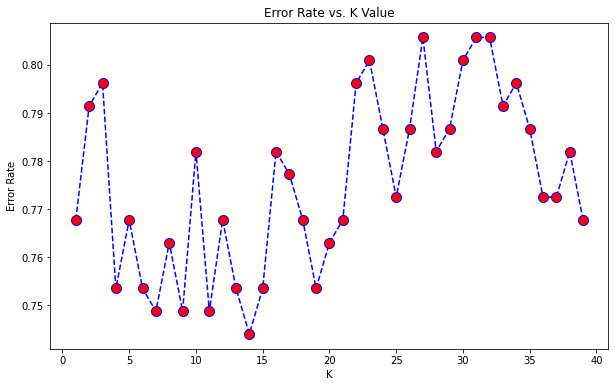

In [42]:
# using the elbow method to determing the best n_neighbors to use for KNN classifier

# keeping a list of the error for each n used
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

# plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Inspired by the article linked below
# https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

In [43]:
# now using the model with the optimal n_neighbors
knn = KNeighborsClassifier(n_neighbors=14)
# fitting
knn.fit(X_train, y_train)
# predicting
yt_p = knn.predict(X_train)
yv_p = knn.predict(X_val)

# results
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(y_val, yv_p))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val, yv_p))

Training Accuracy 0.3769322235434007
Validation  Accuracy 0.2559241706161137


Classification report on validation data: 
 [[20  7  7  7  6]
 [14  9  7  6 10]
 [ 9  8  8  7  7]
 [ 5  9  9  7  6]
 [ 6  4 10 13 10]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.37      0.43      0.40        47
           1       0.24      0.20      0.22        46
           2       0.20      0.21      0.20        39
           3       0.17      0.19      0.18        36
           4       0.26      0.23      0.24        43

    accuracy                           0.26       211
   macro avg       0.25      0.25      0.25       211
weighted avg       0.25      0.26      0.25       211



## **Models using on scaled data**

In [44]:
# using dataset using scaled data
X=df_scaled.drop('label', axis=1)
y=df_scaled['label']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((841, 11), (211, 11), (841,), (211,))

**Random Forest Classifier**

In [45]:
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
# fitting to the dataset
rfc.fit(X_train, y_train)
# making predictions 
yt_p = rfc.predict(X_train)
yv_p = rfc.predict(X_val)

#results
print('Training Accuracy: ', np.mean(yt_p==y_train))
print('Validation  Accuracy: ', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(y_val,yv_p))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val,yv_p))

Training Accuracy:  1.0
Validation  Accuracy:  0.4075829383886256


Classification report on validation data: 
 [[21  9  5  8  4]
 [12 15  6  9  4]
 [ 1  6 20  6  6]
 [ 4  9  5 11  7]
 [ 1  3  9 11 19]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.54      0.45      0.49        47
           1       0.36      0.33      0.34        46
           2       0.44      0.51      0.48        39
           3       0.24      0.31      0.27        36
           4       0.47      0.44      0.46        43

    accuracy                           0.41       211
   macro avg       0.41      0.41      0.41       211
weighted avg       0.42      0.41      0.41       211



**Logistic Regression**

In [46]:
log = LogisticRegression(random_state=101)
# fitting to training data
log.fit(X_train, y_train)
# predictions
yt_p = log.predict(X_train)
yv_p = log.predict(X_val)

# results
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(y_val, yv_p))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val, yv_p))

Training Accuracy 0.34839476813317477
Validation  Accuracy 0.3412322274881517


Classification report on validation data: 
 [[21  8  1  8  9]
 [14 17  4  4  7]
 [ 5  9  6  7 12]
 [ 5  9  5  7 10]
 [ 6  6  6  4 21]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.41      0.45      0.43        47
           1       0.35      0.37      0.36        46
           2       0.27      0.15      0.20        39
           3       0.23      0.19      0.21        36
           4       0.36      0.49      0.41        43

    accuracy                           0.34       211
   macro avg       0.32      0.33      0.32       211
weighted avg       0.33      0.34      0.33       211



**K Nearest Neighbors**

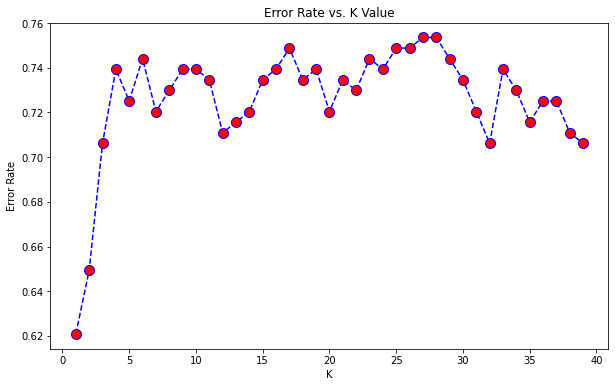

In [47]:
# as used before, using elbow method to find optimal n_neighbors
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

# plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

In [48]:
# using model with best n_neighbor value
knn = KNeighborsClassifier(n_neighbors=1)
# fitting
knn.fit(X_train, y_train)
# generating predictions
yt_p = knn.predict(X_train)
yv_p = knn.predict(X_val)

# results
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(yv_p,y_val))
print('\n')
print('Classification report on validation data: \n', classification_report(yv_p,y_val))

Training Accuracy 1.0
Validation  Accuracy 0.3791469194312796


Classification report on validation data: 
 [[20 11  4  3  3]
 [ 7 19  2 10  5]
 [ 5  6 16  3 11]
 [11  7 10 12 11]
 [ 4  3  7  8 13]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.43      0.49      0.45        41
           1       0.41      0.44      0.43        43
           2       0.41      0.39      0.40        41
           3       0.33      0.24      0.28        51
           4       0.30      0.37      0.33        35

    accuracy                           0.38       211
   macro avg       0.38      0.39      0.38       211
weighted avg       0.38      0.38      0.38       211



## **Feature Selection for Random Forest Classifier**

In [49]:
X=df_scaled.drop('label', axis=1)
y=df_scaled['label']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((841, 11), (211, 11), (841,), (211,))

In [50]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
# using sequential forward selector to select the best 6 features to use when performing RFC
sfs = SFS(RandomForestClassifier(),
          n_features_to_select = 6,
          direction='backward',
          scoring='accuracy')
sfs.fit_transform(X, y)
sfs.get_feature_names_out()

array(['power', 'pitch_mean', 'pitch_std', 'chroma_mean',
       'spec_cent_mean', 'chroma_cqt_mean'], dtype=object)

In [52]:
# only keeping the most useful combination of features
X = df_scaled.drop(['power','voiced_fr','zero_mean','roll_off_mean','chroma_cqt_mean', 'label'], axis =1)
y = df_scaled['label']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((841, 6), (211, 6), (841,), (211,))

In [53]:
# computing new prediction results with only the 6 most important features
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(X_train, y_train)
yt_p = rfc.predict(X_train)
yv_p = rfc.predict(X_val)

# results
print('Training Accuracy: ', np.mean(yt_p==y_train))
print('Validation  Accuracy: ', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(y_val,yv_p))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val,yv_p))

Training Accuracy:  1.0
Validation  Accuracy:  0.4597156398104265


Classification report on validation data: 
 [[27  8  4  5  3]
 [10 16  6  6  8]
 [ 2  9 16  4  8]
 [ 8  7  2 12  7]
 [ 0  1  9  7 26]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.57      0.57      0.57        47
           1       0.39      0.35      0.37        46
           2       0.43      0.41      0.42        39
           3       0.35      0.33      0.34        36
           4       0.50      0.60      0.55        43

    accuracy                           0.46       211
   macro avg       0.45      0.45      0.45       211
weighted avg       0.46      0.46      0.46       211



**Improving the hyperparameters for RFC**

In [54]:
# all the hyperparameters variables

n_estimators = [66,75,85,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(5, 15, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 10] # minimum sample number to split a node
min_samples_leaf = [1,2] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [55]:
# using gridsearch to find the best hyperparameters for the RFC model
gs = GridSearchCV(estimator = rfc,param_grid=random_grid, cv = 5, verbose=2, n_jobs = -1)

In [56]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 10],
                         'n_estimators': [66, 75, 85, 100]},
             verbose=2)

In [57]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', gs.best_params_, ' \n')

Random grid:  {'n_estimators': [66, 75, 85, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [2, 10], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]} 

Best Parameters:  {'bootstrap': False, 'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 66}  



In [58]:
# using hyperparameters for RFC algorithm
rfc = RandomForestClassifier(n_estimators=66, min_samples_split=2, min_samples_leaf=1,
                            max_features='auto', max_depth=9, bootstrap=False,random_state=101)
rfc.fit(X_train, y_train)
yt_p = rfc.predict(X_train)
yv_p = rfc.predict(X_val)
# new results
print('Training Accuracy: ', np.mean(yt_p==y_train))
print('Validation  Accuracy: ', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(y_val, yv_p))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val,yv_p))

Training Accuracy:  0.9667063020214031
Validation  Accuracy:  0.4265402843601896


Classification report on validation data: 
 [[24  7  6  5  5]
 [ 9 13  7  8  9]
 [ 4  5 17  4  9]
 [ 9  6  3 11  7]
 [ 2  2  7  7 25]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.50      0.51      0.51        47
           1       0.39      0.28      0.33        46
           2       0.42      0.44      0.43        39
           3       0.31      0.31      0.31        36
           4       0.45      0.58      0.51        43

    accuracy                           0.43       211
   macro avg       0.42      0.42      0.42       211
weighted avg       0.42      0.43      0.42       211



**Feature selection for KNN**

In [59]:
X=df_scaled.drop('label', axis=1)
y=df_scaled['label']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((841, 11), (211, 11), (841,), (211,))

In [60]:
knn = KNeighborsClassifier()
# using sequential forward selector to select the best 6 features to use when performing RFC
sfs = SFS(knn,
          n_features_to_select = 6,
          direction='backward',
          scoring='accuracy')
sfs.fit_transform(X, y)
sfs.get_feature_names_out()

array(['pitch_mean', 'pitch_std', 'voiced_fr', 'chroma_mean',
       'roll_off_mean', 'chroma_cqt_mean'], dtype=object)

In [61]:
# removing irrelevant features for the KNN model
X = df_scaled.drop(['power','Xdb_mean', 'zero_mean', 'mfcc_mean', 'spec_cent_mean', 'label'], axis =1)
y = df_scaled['label']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((841, 6), (211, 6), (841,), (211,))

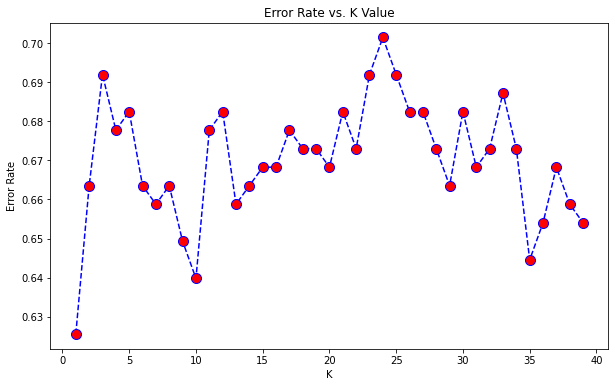

In [62]:
# elbow method for KNN thas is considering the 6 most important features
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

# plotting results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [63]:
# using KNN model with optimal features and n_neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
yt_p = knn.predict(X_train)
yv_p = knn.predict(X_val)

# results
print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('\n')
print('Classification report on validation data: \n', confusion_matrix(yv_p,y_val))
print('\n')
print('Classification report on validation data: \n', classification_report(yv_p,y_val))

Training Accuracy 1.0
Validation  Accuracy 0.3744075829383886


Classification report on validation data: 
 [[20 12  5  8  3]
 [11 13  7  6  5]
 [ 4  9 18  5 10]
 [10  9  3 11  8]
 [ 2  3  6  6 17]]


Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.43      0.42      0.42        48
           1       0.28      0.31      0.30        42
           2       0.46      0.39      0.42        46
           3       0.31      0.27      0.29        41
           4       0.40      0.50      0.44        34

    accuracy                           0.37       211
   macro avg       0.37      0.38      0.37       211
weighted avg       0.38      0.37      0.37       211



**NEURAL NET MODEL**

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [66]:
# usign the scaled dataset with all features
X=df_scaled.drop('label', axis=1)
y=df_scaled['label']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=101)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((841, 11), (211, 11), (841,), (211,))

In [67]:
# as this is a multi-class classification task, the labels need to be numerical
# so this to_categorical method onehotencodes the labels
y_train = to_categorical(y_train, 5)
y_val = to_categorical(y_val,5)

In [68]:
# create the Neural Network model
model = Sequential()
model.add(Dense(11, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))

# softmax activation used which returns a probability vector
model.add(Dense(5, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [69]:
# fitting the NN to our training data
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_val, y_val))

Epoch 1/250
27/27 [==============================] - 1s 11ms/step - loss: 1.8025 - val_loss: 1.7381
Epoch 2/250
27/27 [==============================] - 0s 4ms/step - loss: 1.7241 - val_loss: 1.6891
Epoch 3/250
27/27 [==============================] - 0s 3ms/step - loss: 1.7144 - val_loss: 1.6619
Epoch 4/250
27/27 [==============================] - 0s 4ms/step - loss: 1.6819 - val_loss: 1.6491
Epoch 5/250
27/27 [==============================] - 0s 3ms/step - loss: 1.6395 - val_loss: 1.6421
Epoch 6/250
27/27 [==============================] - 0s 3ms/step - loss: 1.6327 - val_loss: 1.6365
Epoch 7/250
27/27 [==============================] - 0s 4ms/step - loss: 1.6270 - val_loss: 1.6325
Epoch 8/250
27/27 [==============================] - 0s 3ms/step - loss: 1.6357 - val_loss: 1.6264
Epoch 9/250
27/27 [==============================] - 0s 3ms/step - loss: 1.6073 - val_loss: 1.6243
Epoch 10/250
27/27 [==============================] - 0s 3ms/step - loss: 1.6213 - val_loss: 1.6232
Epoch 11

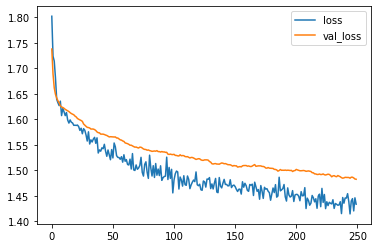

In [70]:
# plotting the loss for both training and validation data
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [71]:
y_val

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from numpy import argmax
yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

# this for loop takes the probability vector, reads to most probable label using argmax() and returns the correct
# prediction vector, this will enable to compute accuracy scores
predictions = []
for i in yv_p:
  idx = argmax(i)
  if idx == 0:
    pred = [1., 0., 0., 0., 0.]
  elif idx == 1:
    pred = [0., 1., 0., 0., 0.]
  elif idx == 2:
    pred = [0., 0., 1., 0., 0.]
  elif idx == 3:
    pred = [0., 0., 0., 1., 0.]
  else:
    pred = [0., 0., 0., 0., 1.]
  predictions.append(pred)


# results
acc = accuracy_score(y_val, predictions)
print('Test Accuracy using Neural Nets: ', acc)
print('\n')
# print('Classification report on validation data: \n', confusion_matrix(y_val, predictions))
print('\n')
print('Classification report on validation data: \n', classification_report(y_val, predictions))

Test Accuracy using Neural Nets:  0.35071090047393366




Classification report on validation data: 
               precision    recall  f1-score   support

           0       0.50      0.30      0.37        47
           1       0.30      0.20      0.24        46
           2       0.30      0.15      0.20        39
           3       0.29      0.22      0.25        36
           4       0.35      0.86      0.50        43

   micro avg       0.35      0.35      0.35       211
   macro avg       0.35      0.35      0.31       211
weighted avg       0.35      0.35      0.32       211
 samples avg       0.35      0.35      0.35       211



# 9 Conclusions


This comprehensive advanced solution investigated how various supervised learning models performed on a multi-classification task. Initially using over ten features, each model’s performance was assessed classifying five famous film songs. The first conclusion drawn from the results is the importance of using scaled values. Unlike the basic solution where the difference was barely significant, the scaled data improved accuracy for every model. Admittedly the Random Forest Classifier (RFC) improvement was only marginal, however, Logistic regression and K-nearest Neighbors (KNN) increased by 5 and 13% percent respectively. Subsequently, only scaled data was considered when fine tuning the model’s performance later. An interesting conclusion that is worth mentioning is when inspecting the confusion matrix’s (using scaled data and selected features), for both RFC and KNN model’s the song that was classified the best were potter and mamma-mia. This suggest that either these songs possessed very distinctive features that the models were able to learn from, or the quality of those recordings we’re clearer than the other songs. 

Moreover, feature selection was once again considered for the top performing models of RFC and KNN, sequential feature selection, SFS was used for each model which starts will all the given features and with every iteration eliminates the most irrelevant one until it reaches a user-specified number of features, in this case six. Feature selection did show improvement for the RF classifier increasing the accuracy from 0.41 to 0.46 (2dp). On the other hand, for KNN there was no improvement noticed, this suggest the KNN algorithm over-fits the validation data when it does not have the all the information provided by the original eleven features.

Subsequently there was an attempt to fine tune the hyperparameters for RFC, GridSearchCV enabled each possible combination of hyperparameters to be considered which in theory will improve the results even more. However, in the case above the very opposite occurred, the results for RFC decreased from 0.46 to 0.43 (2dp) which suggest the model was starting to overfit to the training data and therefore our testing accuracy suffered as a result.

A neural net was also created for the last model of this advanced solution. When compared to the basic solution there are many similarities regarding the construction of the model, for instance, the number of neurons on the first layer again matches the number of features used for predictors plus dropout was included again to prevent the model overfitting. However, there is a key difference on the last layer added. As the task is classifying five songs the number of neurons is five, and the activation used is the ‘softmax’ function. This function returns a 5-element vector consisting of probabilities and who’s values sum to one. Each value is the model’s probability the given object belongs to each of the five classes. Therefore, the greatest value is taken as the classifier’s prediction. The results show a testing accuracy of 0.35 which is not terrible considering the model has not been fine-tuned or assessed any other variation of deep neural nets.

For further research I suggest few ideas, the first is to accumulate audio files of greater quality, when inspecting a random ensemble of files, it is fair to say they could be of better. When conducting full research project, the experimenting when collecting data could filter immediately to ensure the files entering the folder is of the highest quality, furthermore, having a few examples of the original song clipped at the appropriate timeslots might benefit the model’s ability to classify other hums and whistles. In addition, from the examples I observed, the hums were easier to recognise from personal experience than the whistle instances (perhaps participants found it easier to hum to the songs than whistle), as a result, creating a dataset complete with only hums of each song would be an interesting addition to further the research.   


# Citations:

- [1] - Dr Jesús Requena Carrión, 2021, ECS7020P Principles of Machine Learning
Methodology II Lecture Slides

- [2] – Analytics Vidhya, 2020, A comprehensive guide to Feature Selection using Wrapper methods in Python, Accessed: 13/12/2021, https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/


- [3] - Towards Data Science, 2018, Music Feature Extraction in Python, Accessed: 13/12/2021, 
 https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

- [4] – Medium, 2018, The dummy’s guide to MFCC, Accessed: 13/12/2021, https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd


- [5] Librosa Documentation, 2021, librosa.feature.spectral_centroid, Accessed: 13/12/2021, http://librosa.org/doc/main/generated/librosa.feature.spectral_centroid.html


- [6] Kaggle, Shreya Sajal, 2021, LIBROSA Audio Feature Extraction, Accessed: 13/12/2021,  https://www.kaggle.com/shreyasajal/birdclef-2021-librosa-audio-feature-extraction

- [7] – MonkeyLearn, Bruno Stecanella, 2017, Support Vector Machines (SVM) Algorithm Explained, Accessed: 13/12/2021, https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/